In [5]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


## Data Preprocessing

In [163]:
#1.drop constant columns if any (since we don't have them, we are not dropping it)

In [15]:
#2.Check unique columns
data.drop('EmpNumber',axis=1,inplace=True)

In [21]:
#3.Check Null values/missing values
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [23]:
#4.Drop duplicates
data.duplicated().sum()

0

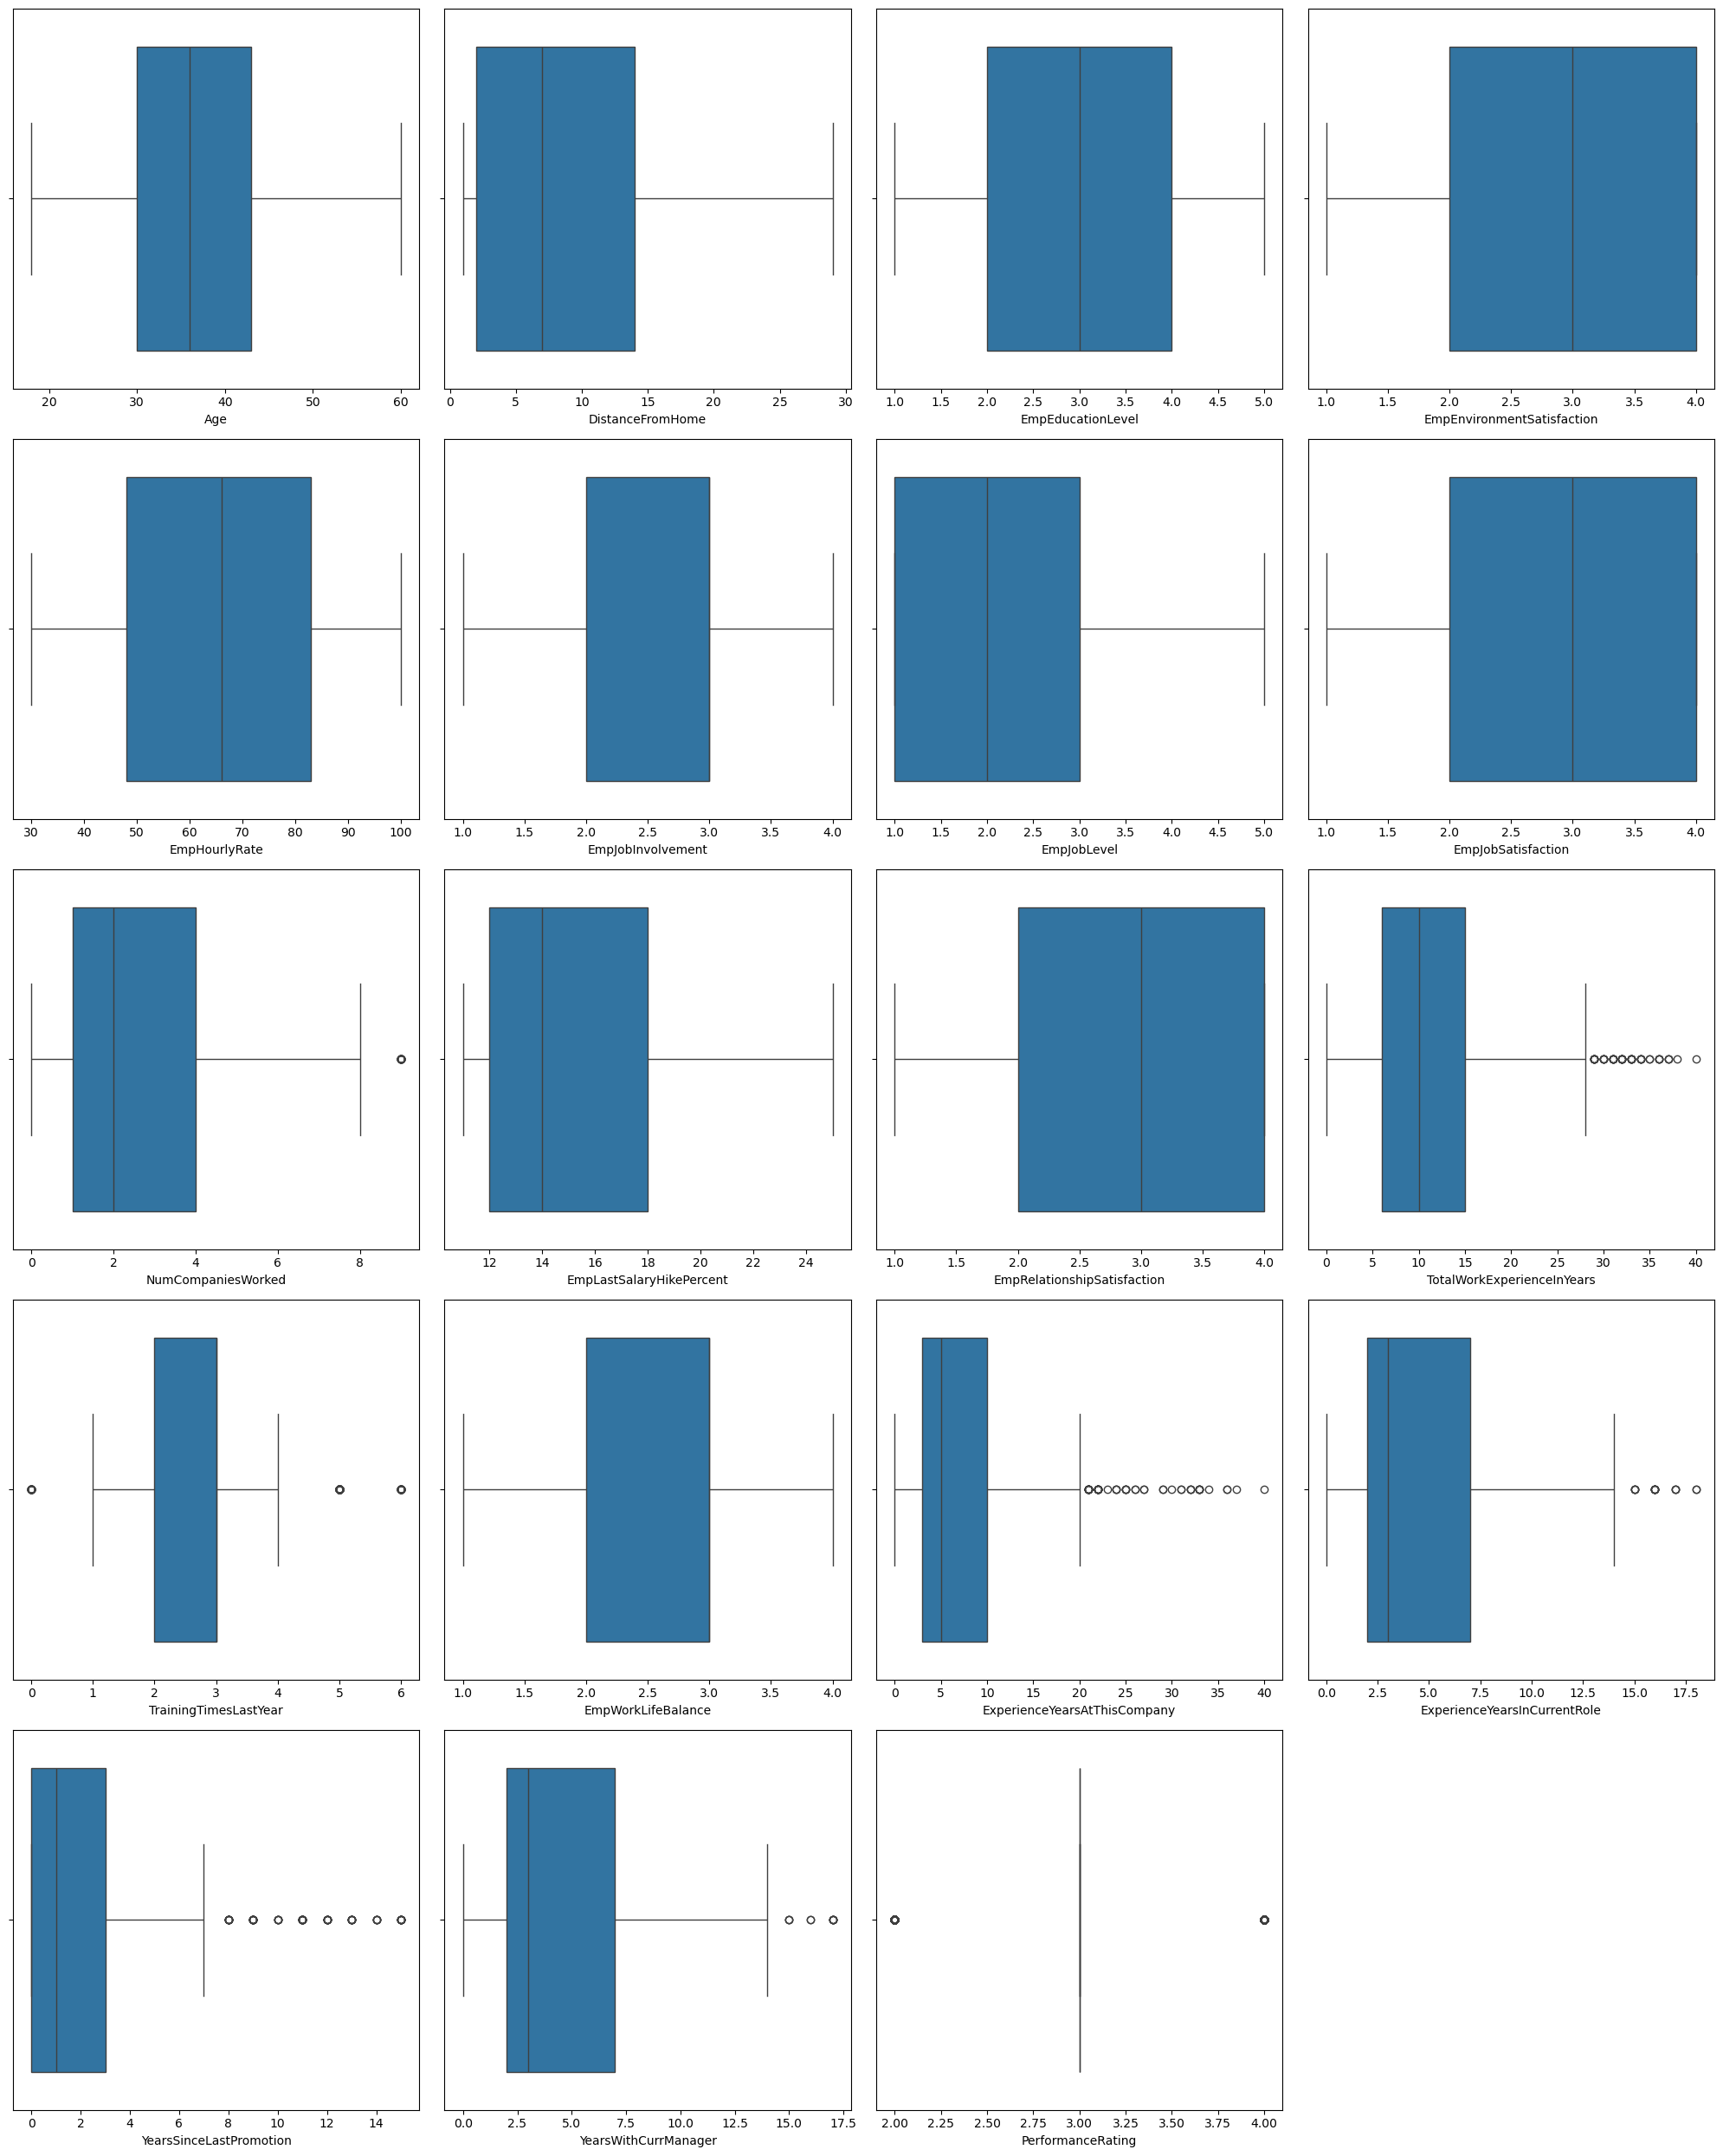

In [47]:
#5.Outlier handling
plt.figure(figsize=(20,25),facecolor="white")
plot=1
for i in data.drop(['Gender', 'EducationBackground', 'MaritalStatus','EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency','OverTime','Attrition'],axis=1):
    ax = plt.subplot(5,4,plot)
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    plot+=1
plt.tight_layout()
plt.show()

### Encoding

**Techniques**

1. Label Encoding - In this technique, each category is assigned a unique integer label according to the alphabetical order.

2. Ordinal encoding - It is similar to label encoding but allows you to explicitly define the order of integer labels on the category.

3. Frequency Encoding - This is used to map feature labels based on its frequency. 

4. Target Encoding - This is used to map feature labels based on the target variable. It orders the data based on the highest frequency of the target.

In [60]:
list(data.select_dtypes('object'))

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [69]:
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [71]:
#Frequency encoding 
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [73]:
data.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

In [75]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [78]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Divorced','Single','Married']])
data['MaritalStatus'] = oe.fit_transform(data[['MaritalStatus']])

In [80]:
data.MaritalStatus.value_counts()

MaritalStatus
2.0    548
1.0    384
0.0    268
Name: count, dtype: int64

In [85]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [87]:
# Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [89]:
data.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

In [91]:
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [93]:
#Frequency Encoding
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [95]:
data.EmpJobRole.value_counts()

EmpJobRole
18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: count, dtype: int64

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

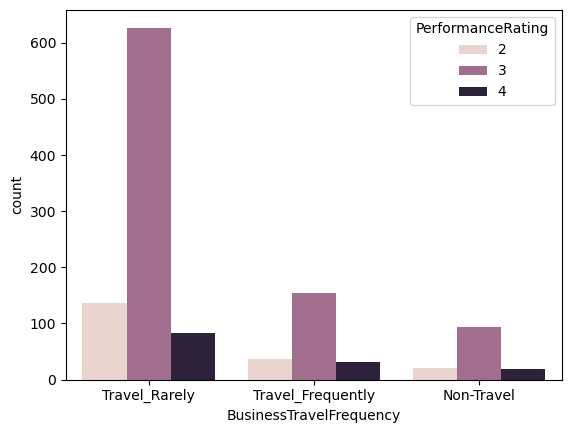

In [101]:
sns.countplot(x=data.BusinessTravelFrequency,hue=data['PerformanceRating'])

In [103]:
#Target Encoding
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [113]:
data['OverTime'].value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [115]:
#Label Encoding
data['OverTime'] = le.fit_transform(data['OverTime'])

In [117]:
data['OverTime'].value_counts()

OverTime
0    847
1    353
Name: count, dtype: int64

In [119]:
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [121]:
#Label Encoding
data['Attrition'] = le.fit_transform(data['Attrition'])

In [123]:
data.Attrition.value_counts()

Attrition
0    1022
1     178
Name: count, dtype: int64

In [127]:
data.head() #encoded data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1.0,5,18,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,3,1.0,5,18,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,5,2.0,5,18,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0.0,2,11,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,3,1.0,5,18,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


## Scaling
Scaling is a process which converts wide range/huge difference data into a defined range.

**Types**:
1. Standardization(Standard Scaler) : Transforms the data into the range of -z to +z , Generally -3 to +3 if no outliers
2. Normalization(Min Max Scaler) : It transforms the data into the range of 0 to 1.

In [149]:
data1 = data.copy()

In [153]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #Create Object
data1[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'
       ]]=scaler.fit_transform(data1[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

In [155]:
data1.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,3,1.0,5,18,2,0.102061,3,4,...,4,-0.170645,-0.622235,2,0.468778,0.749766,-0.681372,1.100251,0,3
1,1.109888,1,3,1.0,5,18,2,0.591464,4,4,...,4,1.112397,-0.622235,3,-0.012431,0.749766,-0.370834,0.817773,0,3
2,0.339260,1,5,2.0,5,18,1,-0.509693,4,4,...,3,1.112397,-0.622235,3,1.752001,2.410786,-0.370834,2.230163,0,4
3,0.449349,1,0,0.0,2,11,2,0.102061,4,2,...,2,1.497310,-0.622235,2,2.233210,0.472929,3.045084,0.535296,0,3
4,2.541054,1,3,1.0,5,18,2,0.836165,4,1,...,4,-0.170645,-1.414051,3,-0.814446,-0.634417,-0.060296,-0.594616,0,3


In [196]:
import pickle
with open('processing.pkl',"wb") as file:
    pickle.dump(data1,file)